## !python --version

In [1]:
pip show statsmodels

Name: statsmodels
Version: 0.14.0
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: c:\users\asus\anaconda3\lib\site-packages
Requires: numpy, packaging, pandas, patsy, scipy, scipy
Required-by: pmdarima
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import timedelta



In [3]:

df = pd.read_csv('Telkom.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3750.0,3790.0,3690.0,3770.0,3249.883301,272812700
1,2019-01-08,3770.0,3860.0,3730.0,3850.0,3318.845947,478130500
2,2019-01-15,3860.0,4050.0,3850.0,4030.0,3474.012939,460955700
3,2019-01-22,4000.0,4010.0,3730.0,3780.0,3258.503418,531602600
4,2019-01-29,3780.0,3930.0,3780.0,3780.0,3258.503418,464647400
...,...,...,...,...,...,...,...
174,2022-05-03,4560.0,4560.0,4300.0,4310.0,4157.917480,343682000
175,2022-05-10,4120.0,4480.0,4120.0,4260.0,4109.681641,860249400
176,2022-05-17,4250.0,4290.0,4070.0,4110.0,3964.974609,807191200
177,2022-05-24,4120.0,4340.0,4120.0,4250.0,4100.034668,612416700


In [4]:
df = df[['Date','Close']]
df

,Date,Close
0,2019-01-01,3770.0
1,2019-01-08,3850.0
2,2019-01-15,4030.0
3,2019-01-22,3780.0
4,2019-01-29,3780.0
...,...,...
174,2022-05-03,4310.0
175,2022-05-10,4260.0
176,2022-05-17,4110.0
177,2022-05-24,4250.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True) 
df['Close']=df['Close'].astype(float)
df

,Close
Date,
2019-01-01,3770.0
2019-01-08,3850.0
2019-01-15,4030.0
2019-01-22,3780.0
2019-01-29,3780.0
...,...
2022-05-03,4310.0
2022-05-10,4260.0
2022-05-17,4110.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2019-01-01 to 2022-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


<AxesSubplot:xlabel='Date'>

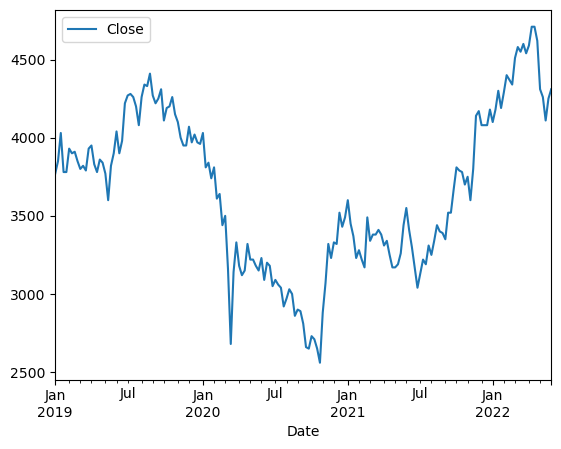

In [6]:
df.info()
df.plot()


In [7]:
print(df.shape)
train=df.iloc[:len(df)-35]
test=df.iloc[len(df)-35:]
print(train.shape,test.shape)


(179, 1)
(144, 1) (35, 1)


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,179.0,3664.581006,507.912912,2560.0,3230.0,3740.0,4080.0,4710.0


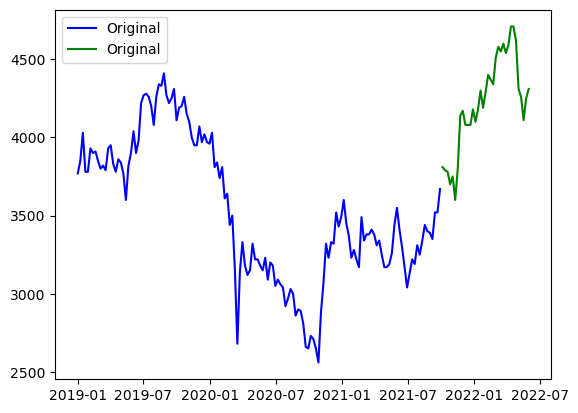

In [9]:
plt.plot(train, color = 'blue', label = 'Original')
plt.plot(test, color = 'green', label = 'Original')
plt.legend(loc = 'best')
plt.show()


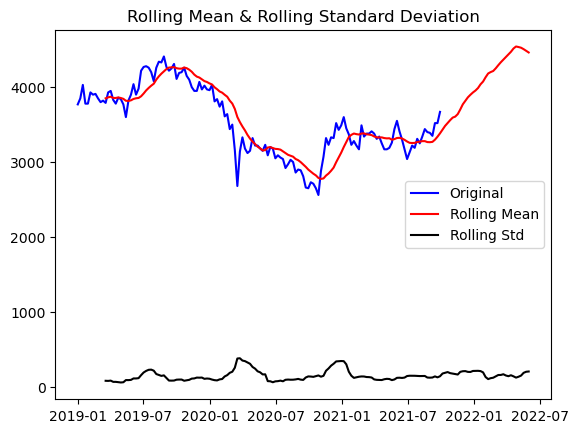

In [10]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(train, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

<Figure size 640x480 with 0 Axes>

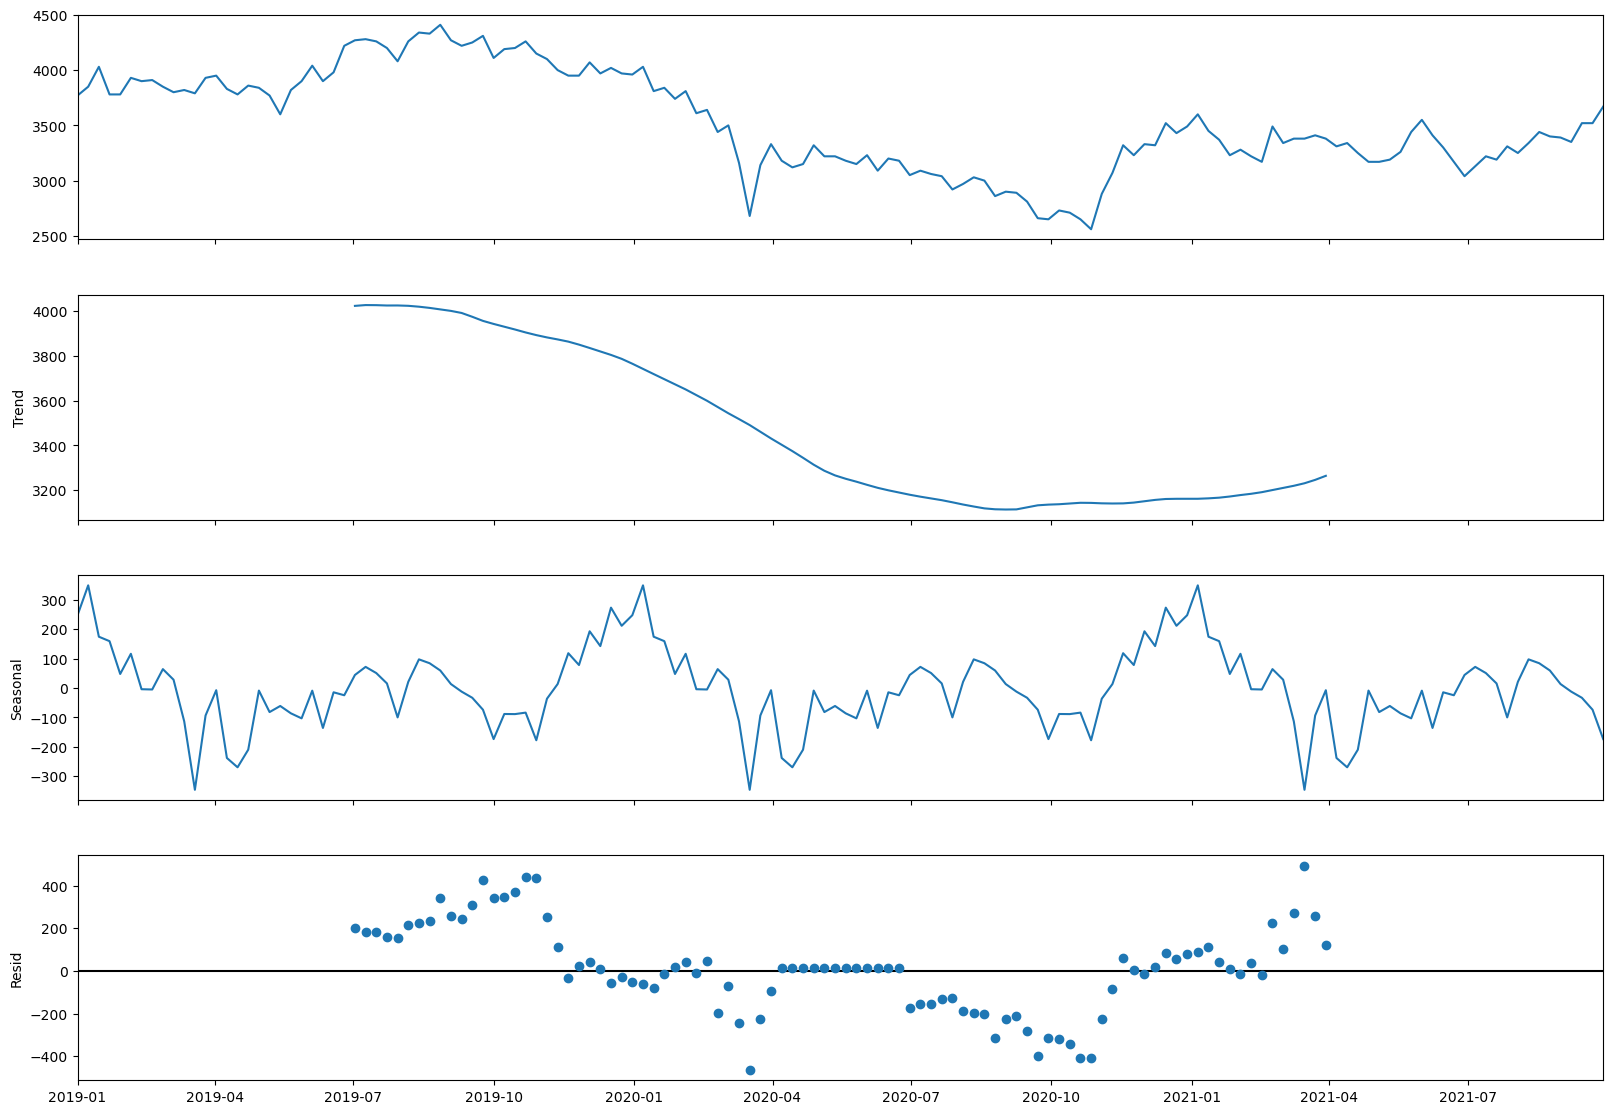

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='addictive')

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 12)

In [12]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(train['Close'])

In [13]:
#tes stasioner

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.6900026688005316
p-value: 0.43627062416212903
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


In [14]:
train['1diff'] = train['Close'] - train['Close'].shift(1)
train['2diff'] = train['1diff'] - train['1diff'].shift(1)

In [15]:
result=adfuller(train['1diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -12.811409163767111
p-value: 6.4346806272879216e-24
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494


In [16]:
result=adfuller(train['2diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -7.087094619607453
p-value: 4.508985638753538e-10
Critical Values:
	1%: -3.480118600110386
	5%: -2.8833618426136196
	10%: -2.578407034974382


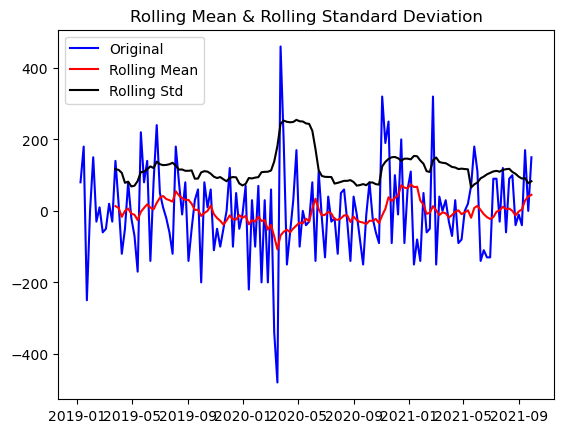

In [17]:
rolling_mean = train['1diff'].rolling(window = 12).mean()
rolling_std = train['1diff'].rolling(window = 12).std()
plt.plot(train['1diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

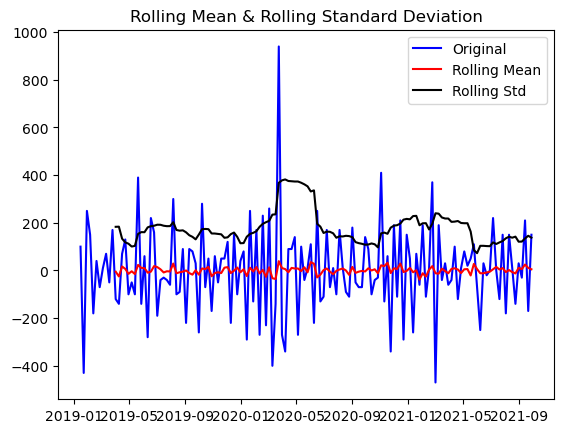

In [18]:
rolling_mean = train['2diff'].rolling(window = 12).mean()
rolling_std = train['2diff'].rolling(window = 12).std()
plt.plot(train['2diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

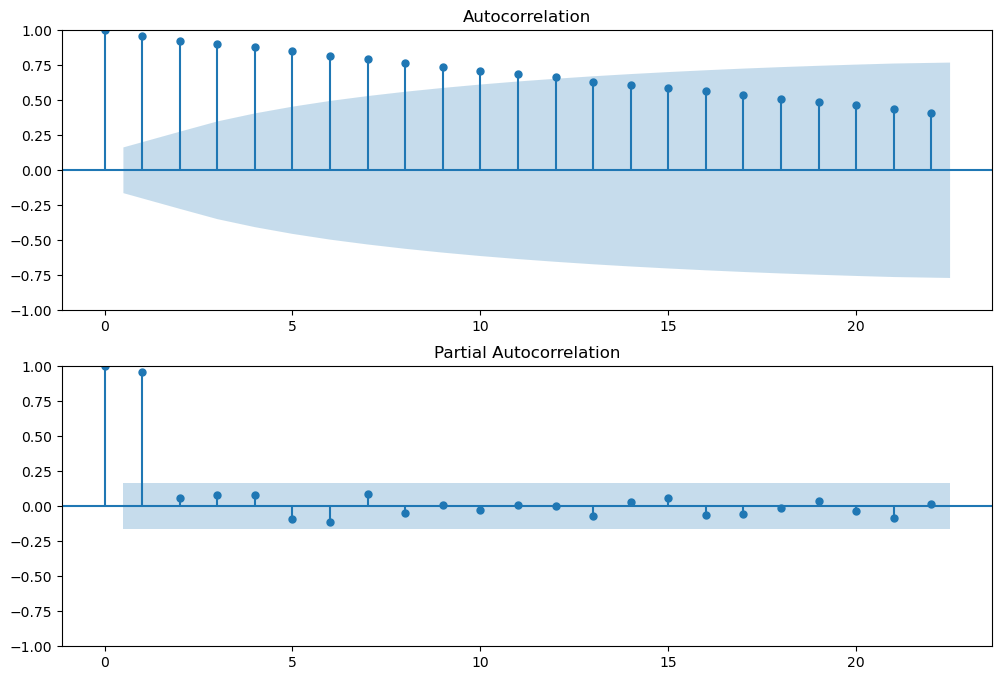

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'], ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Close'], ax=ax2, )

In [20]:
from statsmodels.tsa.stattools import acf
print(acf(train['Close']))

[1.         0.96031199 0.92697956 0.90097919 0.88108958 0.85316304
 0.81798888 0.79310338 0.76647355 0.7410455  0.712037   0.68621872
 0.66280427 0.63388634 0.60889621 0.58895963 0.56603183 0.53794467
 0.51039721 0.49055623 0.46821704 0.43844592]


In [21]:
from statsmodels.tsa.stattools import pacf
print(pacf(train['Close']))

[ 1.          0.96702746  0.07544964  0.10441516  0.10499973 -0.10792502
 -0.13823472  0.10929629 -0.06631476  0.01363031 -0.02763888  0.00576808
  0.00366768 -0.08881152  0.03760424  0.08381892 -0.08858517 -0.07323202
 -0.01262118  0.04310602 -0.04836152 -0.11378585]


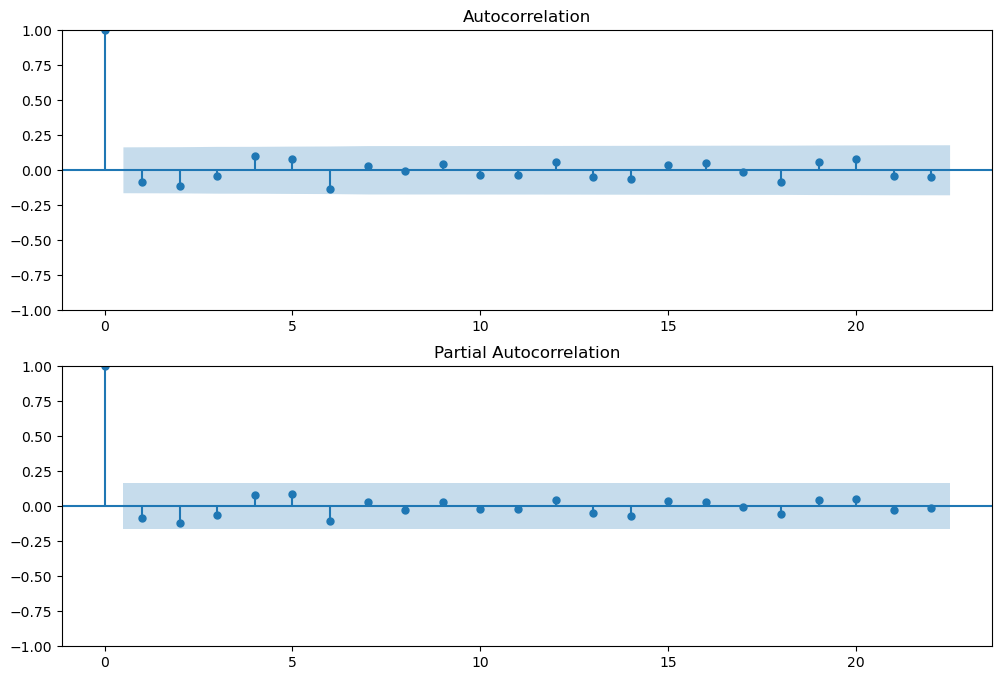

In [22]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['1diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['1diff'].dropna(), ax=ax2, )

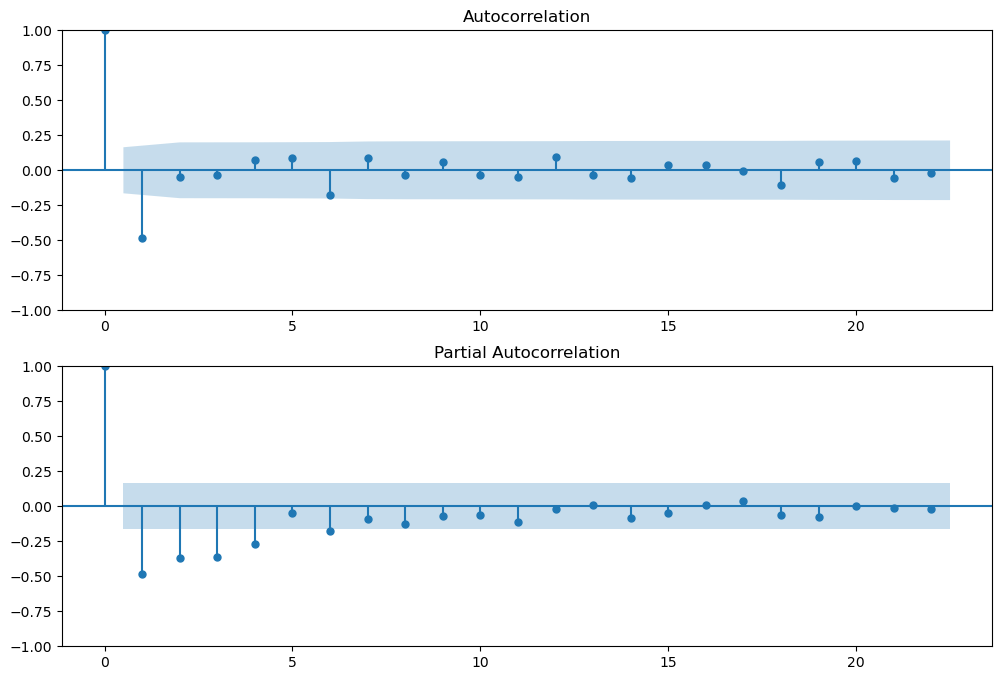

In [23]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['2diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['2diff'].dropna(), ax=ax2, )

In [24]:
from statsmodels.tsa.stattools import acf
print(acf(train['2diff'].dropna()))

[ 1.         -0.48468228 -0.04732986 -0.03089208  0.07511148  0.0906788
 -0.17819515  0.09111824 -0.0342523   0.05660094 -0.03665714 -0.04659849
  0.09607864 -0.03574452 -0.05266702  0.03526622  0.04025294 -0.00374914
 -0.10306481  0.05863597  0.06645952 -0.05317929]


In [25]:
from statsmodels.tsa.stattools import pacf
print(pacf(train['2diff'].dropna()))

[ 1.         -0.48811975 -0.37580699 -0.3779461  -0.29087081 -0.06189148
 -0.19500601 -0.11592048 -0.15289613 -0.10113718 -0.09027834 -0.15324834
 -0.06031483 -0.0185612  -0.12266448 -0.09657497 -0.02871893  0.01816406
 -0.1022412  -0.12731422 -0.04002182 -0.06088487]


In [26]:
freq = pd.infer_freq(df.index)
print(freq)

W-TUE


In [27]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train['Close'], order=(1,2,1), freq='W-TUE')
model1 = model1.fit()
model1.summary()



C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -890.379
Date:                Wed, 21 Jun 2023   AIC                           1786.758
Time:                        20:13:47   BIC                           1795.626
Sample:                    01-01-2019   HQIC                          1790.362
                         - 09-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0725      0.058     -1.244      0.213      -0.187       0.042
ma.L1         -0.9980      0.216     -4.613      0.000      -1.422      -0.574
sigma2       1.57e+04   3491.458      4.496      0.000    8853.322    2.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                25.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.07
Prob(H) (two-sided):                  0.69   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
sm.stats.acorr_ljungbox(model1.resid, lags=[12,20,24,48], return_df=True)

,lb_stat,lb_pvalue
12,19.282346,0.081939
20,20.259006,0.441836
24,20.643208,0.659673
48,22.994338,0.999158


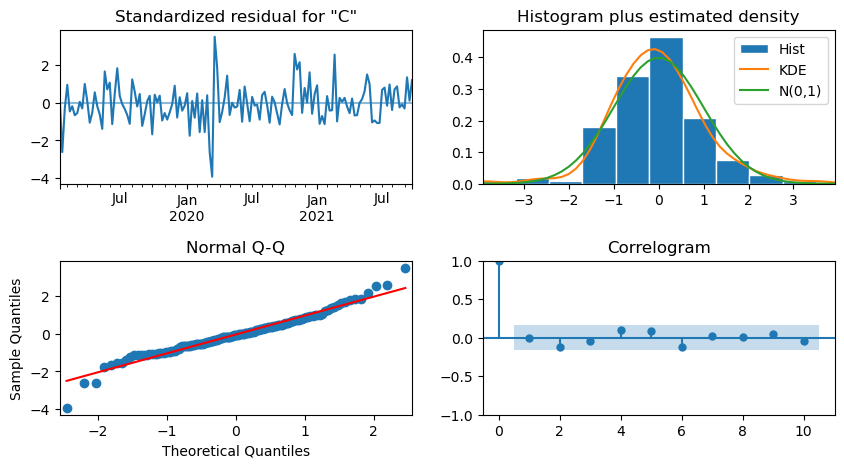

In [29]:
model1.plot_diagnostics(figsize=(10, 5))

# Menyesuaikan tata letak
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Menampilkan plot
plt.show()

2019-01-22    4185.044615
2019-01-29    3826.227206
2019-02-05    3796.235445
2019-02-12    3962.699509
2019-02-19    3935.106101
                 ...     
2021-09-07    3388.218905
2021-09-14    3350.112922
2021-09-21    3506.130399
2021-09-28    3518.551587
2021-10-05    3658.768657
Freq: W-TUE, Name: ARIMA predictions, Length: 142, dtype: float64

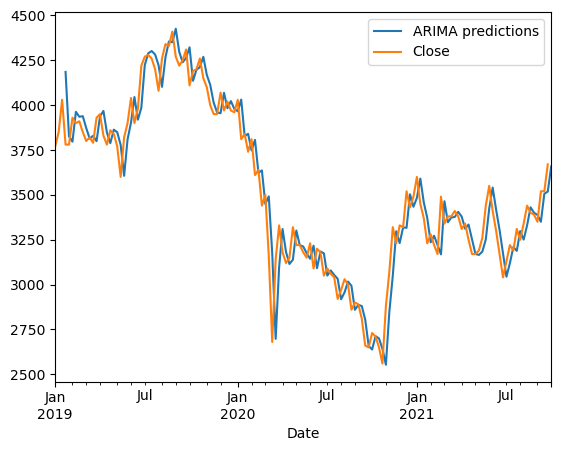

In [30]:
start=3
end=144
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
predik= model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
predik.plot(legend=True)
train['Close'].plot(legend=True)
predik

<AxesSubplot:xlabel='Date'>

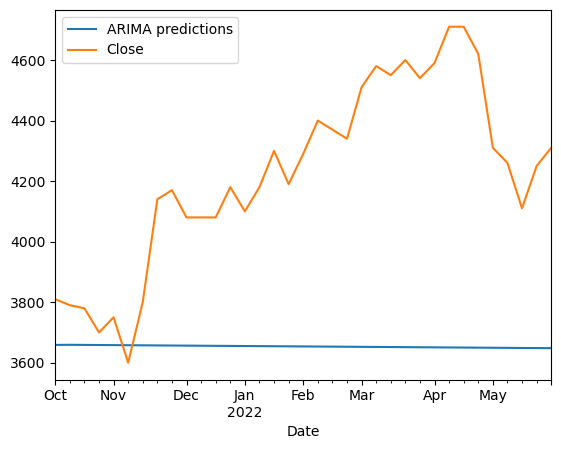

In [31]:
start=len(train)
end=len(train)+len(test)-1

pred=model1.predict(start=start,end=end,typ='levels', dynamic=False).rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test['Close'], pred)
print('MAPE: %f' % mape)

MAPE: 0.131019


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Close'], pred)
print('MSE: %f' % mse)

MSE: 414562.411630


In [34]:
Forecasting021 = test.join(pred)
print(Forecasting)

NameError: name 'Forecasting' is not defined

In [ ]:
Forecasting021.to_excel('021.xlsx', index=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
data = df['Close'].dropna()
model = ARIMA(data, order=(0,2,1), freq='W-TUE')
model = model.fit()
model.summary()

In [ ]:
start=179
end=230
forecast = model.predict(start = start, end = end , typ = 'levels').rename('Forecast')





In [ ]:
df['Close'].plot(figsize = (12, 5), legend = True) 

forecast.plot(legend = True)


forecast

In [ ]:
predik.to_excel('predtrain021.xlsx', index=False)

In [ ]:
foretrain = train.join(predik)
print(foretrain)

In [ ]:
Forecasting = test.join(pred)
print(Forecasting)